In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

### Read fluxes

In [3]:
def read_fluxes ():
    # Read the data file
    # Adjust the file path as needed
    data_file = 'heatflux.dat'
    # Use read_csv to read the file
    df1 = pd.read_csv(data_file, sep='\s+', header=None, names=['date', 'time', 'Q'])
    # Combine the 'date' and 'time' columns into a single 'datetime' column
    df1['datetime'] = df1['date'] + ' ' + df1['time']
    # Convert 'datetime' column to datetime format
    df1['datetime'] = pd.to_datetime(df1['datetime'], format='%Y/%m/%d %H:%M:%S')
    # Drop the separate 'date' and 'time' columns if they are no longer needed
    df1.drop(columns=['date', 'time'], inplace=True)
    # Combine the date and time columns if necessary
    # Ensure 'datetime' column is in the correct format
    df1['datetime'] = pd.to_datetime(df1['datetime'], format='%Y/%m/%d %H:%M:%S')

    data_file = 'momentumflux.dat'
    df2 = pd.read_csv(data_file, sep='\s+', header=None, names=['date', 'time', 'taux', 'tauy'])
    df2['datetime'] = df2['date'] + ' ' + df2['time']
    df2['datetime'] = pd.to_datetime(df2['datetime'], format='%Y/%m/%d %H:%M:%S')
    df2.drop(columns=['date', 'time'], inplace=True)
    df2['datetime'] = pd.to_datetime(df2['datetime'], format='%Y/%m/%d %H:%M:%S')

    df = pd.merge(df1, df2, on='datetime')
    df = df[['datetime','Q','taux','tauy']]
    
    xrdf = xr.Dataset(
    {'taux': (['t'], df.taux),
    'tauy': (['t'], df.tauy),
    'Q': (['t'], df.Q)},
    coords={
        "t": df.datetime,
    },)
    
    return xrdf

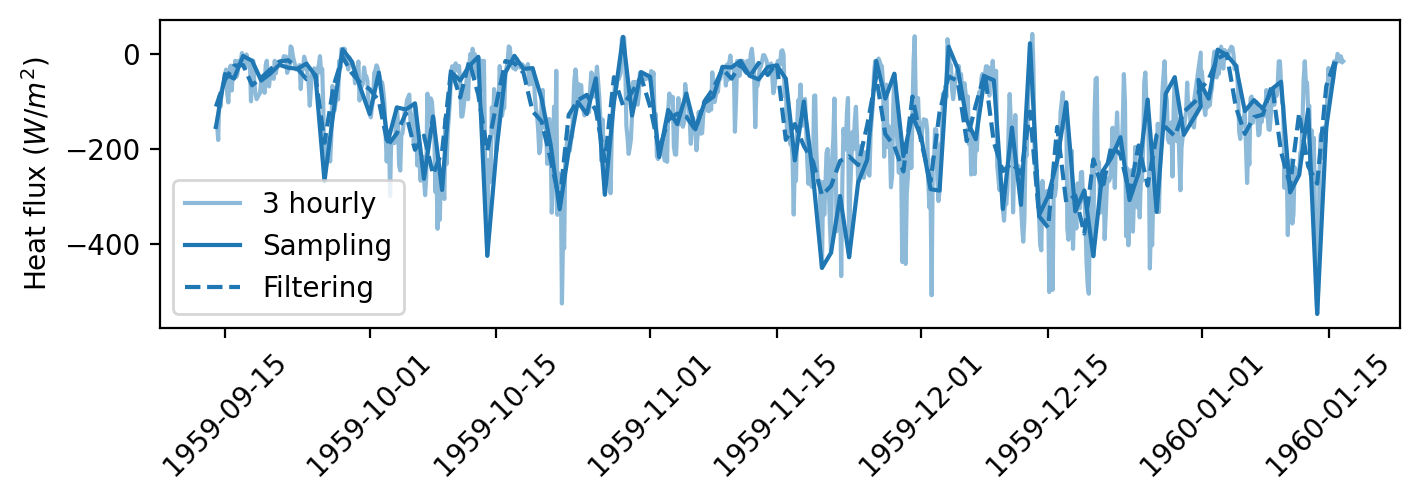

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=[8,2],dpi=200)
ax = plt.gca()

df = read_fluxes()
Q_hat = df.Q.coarsen({'t':8}, boundary='trim').mean()
ax.plot(df.t[:1000], df.Q[:1000], alpha=0.5, label='3 hourly')
ax.plot(df.t[:1000:8], df.Q[:1000:8], c='C0', alpha=1, label='Sampling')
ax.plot(df.t[:1000:8], Q_hat[:125], '--', c='C0', alpha=1, label='Filtering')
# ax.plot(df.datetime[:1000], df.tauy[:1000])
# ax.set_ylim([-0.5,2])
ax.set_ylabel(r'Heat flux ($W/m^2$)')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend()
plt.show()

### Flux output (after manipulation)
Write the filtered flux back into a text file with original format

In [ ]:

time_ = df1['datetime'].dt.strftime('%Y/%m/%d %H:%M:%S')


# Merge DataFrames on their index (the "time" coordinate in this case)
Q_hat_pd = pd.merge(Q_hat.t.to_dataframe(), Q_hat.to_dataframe(), left_index=True, right_index=True)
Q_hat_pd.to_csv("heatflux_filter1day.txt", sep=' ', header=False, index=False)